# <핵심만 요약한 데이터 조작과 시각화 파이썬 코드북>
**각 코드를 설명하는 주석과 연습문제 풀이는 도서에서 확인**할 수 있습니다. 성공적인 학습을 응원합니다.
- ⓒ2024 AlgoBoni all rights reserved.
- 본 컨텐츠의 저작권은 알고보니에 있습니다. 저작권법에 의해 보호를 받는 저작물이므로 무단 전재와 무단 복제를 금합니다.
- 본 컨텐츠의 종이책은 [교보문고](https://product.kyobobook.co.kr/detail/S000213616715), [예스24](https://www.yes24.com/Product/Goods/128117125), [알라딘](https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=341725290)에서 구매할 수 있습니다.

## 6장. 모델 관련 시각화

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding' 
plt.rcParams['font.size'] = 12 
plt.rcParams['figure.figsize'] = (5, 5) 
plt.rcParams['axes.unicode_minus'] = False 

### 6-1. 트리 기반 모델 특성 중요도 시각화: feature_importances_, barh

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = load_breast_cancer()['data'][:, :10] 
X_names = load_breast_cancer()['feature_names'][:10]
y = load_breast_cancer()['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

train set accuracy: 1.000
test set accuracy: 0.916


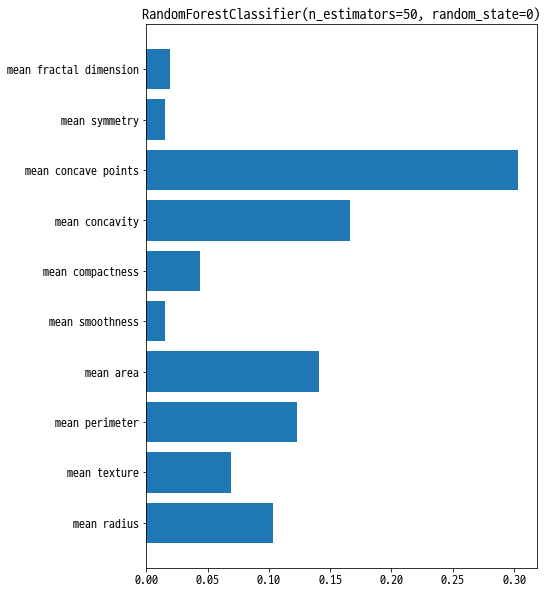

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test) 
rf_prob = rf.predict_proba(X_test)[:, 1] 

print('train set accuracy: {:.3f}'.format(rf.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(rf.score(X_test, y_test)))

fi = rf.feature_importances_
fn = X_names
fig, ax = plt.subplots(figsize=(7,10))
plt.title(rf)
plt.barh(fn, fi)
plt.show()

### 6-2. ROC 곡선과 정밀도-재현율 곡선: roc_curve, precision_recall_curve, plot

In [7]:
pred = rf.predict(X_test)
prob = rf.predict_proba(X_test)[:, 1] 

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        53
           1       0.96      0.90      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)

J = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]
print("Youden's J: %.3f" %best_threshold)

Youden's J: 0.440


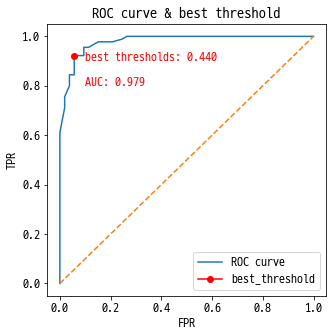

In [9]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_title("ROC curve & best threshold")
ax.plot(fpr, tpr, label="ROC curve")
ax.plot([0,1], [0,1], linestyle='dashed')
ax.plot(best_fpr, best_tpr, marker='o', color='red', label="best_threshold")
ax.text(0.1, 0.9, "best thresholds: %.3f" %(best_threshold), color='red')
ax.text(0.1, 0.8, "AUC: {:.3f}".format(auc), color='red')
ax.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.show()

In [10]:
prob = rf.predict_proba(X_test)[:, 1]
pred2 = np.where(prob >=best_threshold, 1, 0)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        53
           1       0.97      0.92      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [11]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, prob)
thresholds = list(thresholds)+[1]

idx = np.argmin(np.abs(precision - recall))
best_threshold2 = thresholds[idx]
print(best_threshold2)

0.3


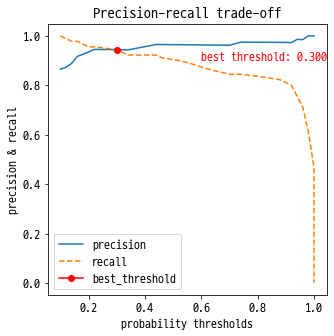

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_title("Precision-recall trade-off")
ax.plot(thresholds, precision, label='precision')
ax.plot(thresholds, recall, label='recall', linestyle='dashed')
ax.plot(best_threshold2, recall[idx], marker='o', color='red', label="best_threshold")
ax.text(0.6, 0.9, "best threshold: %.3f" %(best_threshold2), color='red')
ax.legend()
ax.set_xlabel('probability thresholds')
ax.set_ylabel('precision & recall')
plt.show()

In [13]:
prob = rf.predict_proba(X_test)[:, 1]
pred3 = np.where(prob >=best_threshold2, 1, 0)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



### 6-3. 회귀 그래프: regplot

In [14]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [15]:
import statsmodels.api as sm

X = tips['total_bill']
y = tips['tip']

X = sm.add_constant(X)
regmodel = sm.OLS(y, X)
fitted = regmodel.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           6.69e-34
Time:                        10:20:42   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

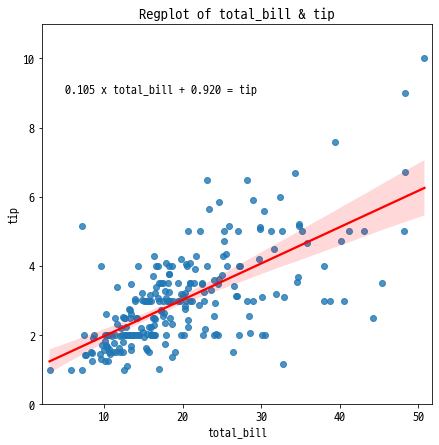

In [16]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (7, 7)
sns.regplot(x='total_bill', y='tip', data=tips, 
            line_kws={'color':'red'}, 
            ci=95) 
plt.title("Regplot of total_bill & tip")
plt.text(5, 9, f"{fitted.params['total_bill']:.3f} x total_bill + {fitted.params['const']:.3f} = tip")

plt.xlim(tips['total_bill'].min()-1, tips['total_bill'].max()+1)
plt.ylim(tips['tip'].min()-1, tips['tip'].max()+1)
plt.show()

### 6-4. 잔차 분석 그래프: resid, zscore, probplot, regplot

In [17]:
from scipy.stats import zscore, probplot
resid = fitted.resid
pred = fitted.fittedvalues 
sresid = zscore(resid) 
print("예측값: \n", pred[:5].values)
print("실제값: \n", y[:5].values.ravel())
print("잔차: \n", resid[:5].values)
print("표준화 잔차: \n", sresid[:5])

예측값: 
 [2.70463616 2.00622312 3.12683472 3.40725019 3.5028225 ]
실제값: 
 [1.01 1.66 3.5  3.31 3.61]
잔차: 
 [-1.69463616 -0.34622312  0.37316528 -0.09725019  0.1071775 ]
표준화 잔차: 
 [-1.66491673 -0.34015129  0.36662094 -0.09554467  0.10529789]


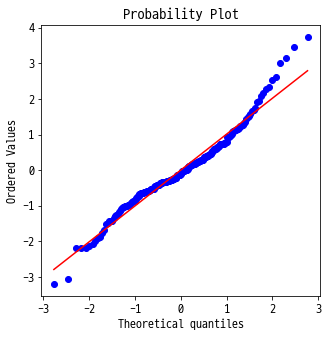

In [18]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
probplot(resid, plot=ax)
plt.show()

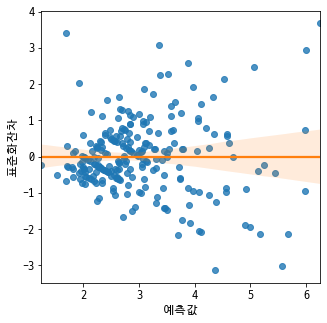

In [19]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.regplot(x=pred, y=sresid, line_kws={'color':'C1'}, ax=ax)
ax.set_xlabel('예측값')
ax.set_ylabel('표준화잔차')
plt.show()

### 6-5. 계층적 군집 시각화: linkage, dendrogram, cut_tree

In [20]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.drop('species', axis=1) 
y = iris[['species']] 
print(iris.head(3), "\n")

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=X.columns)
print(df)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa 

     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


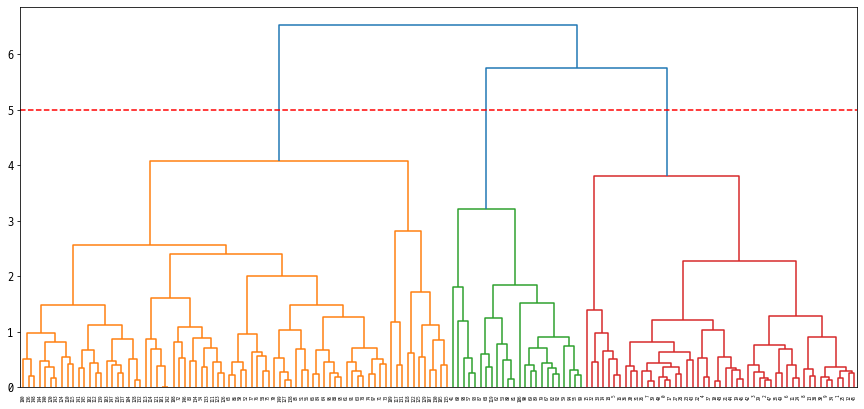

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
Z = linkage(df, method='complete')
distance_setting = 5

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting) 
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

n_cluster = 3
labels = cut_tree(Z, n_cluster).ravel() 
print(labels)

### 6-6. 비계층적 군집 시각화: inertia_, plot, scatterplot

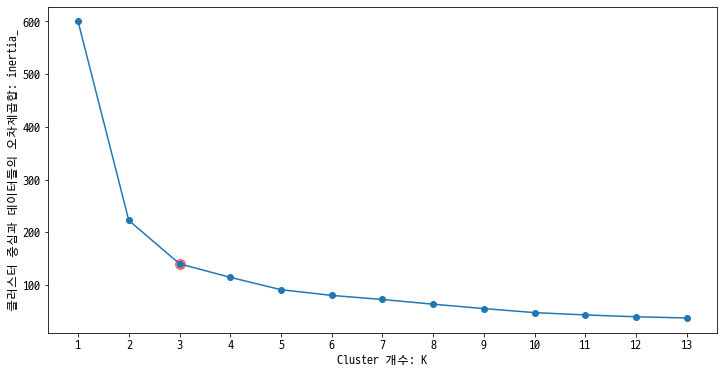

In [12]:
from sklearn.cluster import KMeans
I = [] 
for k in range(1,14):
    kmeans=KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_) 
plt.plot(list(range(1,14)), I, marker="o")

n_cluster = 3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1,14)), list(range(1,14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show()

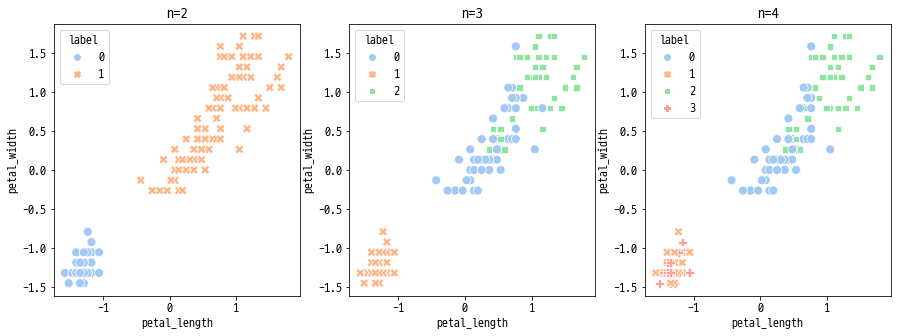

In [14]:
n_list =[2, 3, 4] 
fig, axes = plt.subplots(1,3, figsize = (15,5))
for ax, n in zip(axes, n_list):
    kmeans=KMeans(n_clusters=n).fit(df)
    temp_df = df.copy()
    temp_df['label']=kmeans.labels_
    sns.scatterplot(x='petal_length', y='petal_width', 
                    data=temp_df, hue='label', style='label', s=80, 
                    ax=ax, palette='pastel')
    ax.set_title("n={}".format(n))
plt.show()

### 6-7. 실루엣 다이어그램: silhouette_samples, silhouette_score, fill_betweenx

In [24]:
from sklearn.cluster import KMeans
n = 3
km = KMeans(n_clusters=n)
km.fit(df)
labels = km.labels_ 
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


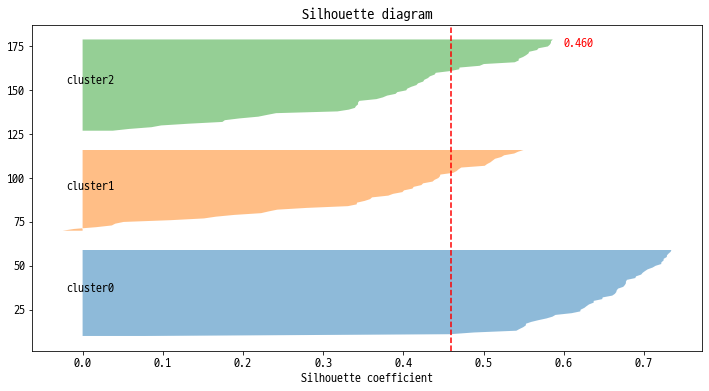

In [34]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df, labels) 
sample_silhouette_values = silhouette_samples(df, labels) 

y_lower = 10 
for i in np.unique(labels): 
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort() 

    size_cluster_i = len(ith_cluster_silhouette_values) 
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.5)

    plt.text(-0.02, y_lower + 0.5 * size_cluster_i, "cluster%s" %i)
    y_lower = y_upper + 10 
    
plt.axvline(x=silhouette_avg, color="red", linestyle="--") 
plt.text(0.6, 175, f"{silhouette_avg:.3f}", color='red')
plt.title("Silhouette diagram")
plt.xlabel("Silhouette coefficient")
plt.show()

## 연습문제

### 1-1. 다음은 타이타닉호 승객의 정보를 담고 있는 데이터셋인 'titanic'이다. 이 데이터셋은 승객의 특성을 나타내는 설명변수들과 생존여부를 나타내는 예측변수('survived')로 구성되어 있다. 다음 조건에 따라 전처리와 모델링을 진행하시오.
- 변수 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked' 외에 나머지 변수는 데이터에서 삭제하기
- 설명변수 'embarked'의 결측치를 데이터에서 삭제하고 인덱스를 리셋하기
- 설명변수 'age'의 결측치를 대치하기 (대푯값 대치, 단순확률대치, KNN 대치 등 대치법 중 선택)
- 설명변수 'sex', 'embarked'에 대해 라벨 인코딩(카테고리형 데이터를 숫자 형태로 변환)을 진행하기
- 전체 데이터를 훈련 데이터(70%)와 검증 데이터(30%)로 나누기
- 훈련 데이터로 예측변수 'survived'를 예측하는 트리(Tree) 기반의 분류 모델을 생성하기

In [24]:
# 데이터 불러오기
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head(3))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  


### 1-2. 앞서 생성한 모델로 테스트 데이터를 예측하여 분류 성능을 ROC 곡선과 AUC로 시각화 하시오. (단, TPR-FPR을 최대화하는 확률 임곗값과 AUC 값을 그래프 상에 텍스트로 표현한다.)

### 2-1. 다음은 1973년 영국의 통계학자 F.J. Anscombe에 의해 제안된 데이터셋 ‘Anscombe’이다. 이 데이터셋은 서로 다른 4종(‘I’, ‘II’, ‘III’, ‘IV’)의 부분 데이터셋으로 구성되어 있다. 이 데이터셋의 변수 dataset 별로 설명변수를 x, 예측변수를 y로 하는 단순 선형 회귀 모델을 각각 생성하고, 각 모델의 회귀계수와 결정계수를 출력 하시오. (단, 데이터 분할 없이 전체 데이터로 학습하고 검증한다.)

In [30]:
# 데이터 불러오기
import seaborn as sns
ans = sns.load_dataset("anscombe")
print(ans.head(6))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
5       I  14.0  9.96


### 2-2. 해당 데이터셋의 변수 'dataset' 별로 회귀 그래프를 시각화하고 회귀선을 비교하시오. (단, 네개의 그래프를 하나의 서브플롯 안에 시각화 한다.)

### 3-1. 다음은 식당에서 고객 별로 지불한 팁에 대한 데이터셋인 ‘tips’이다. 해당 데이터셋을 불러온 후 아래와 같이 전처리를 완료한 데이터프레임 X를 바탕으로 다음 조건에 따라 고객들에 대한 군집 분석을 진행하시오.
- 군집의 개수를 3, 4, 5개로 각각 군집 모델을 생성하기
- 군집 알고리즘은 K-means로 하기
- 리스트 models를 생성하고 군집 모델들을 해당 리스트에 추가하기

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.drop(['day', 'time'], axis=1)

from pandas import DataFrame
df2 = df.copy()
df2['sex'] = df['sex'].apply(lambda x: 0 if x == 'Female' else 1)
df2['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'No' else 1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df3 = ss.fit_transform(df2)
X = DataFrame(df3, columns=df2.columns)
X[['sex', 'smoker']] = df2[['sex', 'smoker']] 

print(X.head(3))

   total_bill       tip sex smoker      size
0   -0.314711 -1.439947   0      0 -0.600193
1   -1.063235 -0.969205   1      0  0.453383
2    0.137780  0.363356   1      0  0.453383


### 3-2. 앞서 생성한 군집 모델들에 대해서 각각 데이터의 산점도를 그리되 군집 별 색상을 구분하여 다음 조건에 따라 시각화 하시오.
- 3개의 그래프를 1행 3열의 서브 플롯으로 시각화 하기
- 각 그래프 제목으로 해당 모델의 군집 개수와 실루엣 계수를 출력하기
- 산점도의 x축은 tip, y축은 total_bill로 지정하기

### 3-3. 앞서 생성한 군집 모델들에 대해서 각각 실루엣 다이어그램을 그리되 다음 조건에 따라 시각화 하시오.
- 3개의 그래프를 1행 3열의 서브 플롯으로 시각화 하기
- 각 그래프 제목으로 해당 모델의 군집 개수와 실루엣 계수를 출력하기
- 평균 실루엣 계수도 그래프 상에 시각화 하기

### 3-4. 앞서 생성한 군집 모델들 중 군집의 개수가 3개인 군집 모델로부터 얻은 군집 라벨 데이터를 원본 데이터프레임 tips에 변수 label로 추가하고, 다음 조건에 따라 시각화 하시오.
- 3행 5열의 전체 크기 가로 15, 세로 10의 서브 플롯을 그리기 
- 행 별로 변수 label이 열 별로 변수 sex, smoker, day, time, size를 나타내도록 각각 막대 그래프를 그리기  
- 각 막대 그래프의 x축에는 변수의 범주들이 표시되고 y축에는 각 범주들의 빈도가 표시되도록 하기
- 1행의 5개 그래프에 한해서 변수를 제목으로 갖도록 설정하기
- 1열의 3개 그래프에 한해서 라벨을 y축의 라벨로 갖도록 설정하기